In [20]:
#load up modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

import pickle
import os

import category_encoders as ce

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

from tqdm.notebook import tqdm

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
#Get dir
path="D:/Kuliah/Semester 5/PSD/psd-challenge/"
os.listdir(path)

def savefile(result, savename):
    try:
        pd.DataFrame(zip(range(1,len(result)+1),result), columns=["No", "UHH"]).to_csv(path+"Kerja lah su/"+savename+".csv", index=False)
    except:
        print("It only saves the result retard!")

In [3]:
#Get dataset                                #Gw baru nyadar train di split lagi?
test_data=pd.read_excel(path+"Test.xlsx")
train=pd.read_excel(path+"Train.xlsx")

In [4]:
X=train.iloc[:,:-1]
y=train.iloc[:,-1]

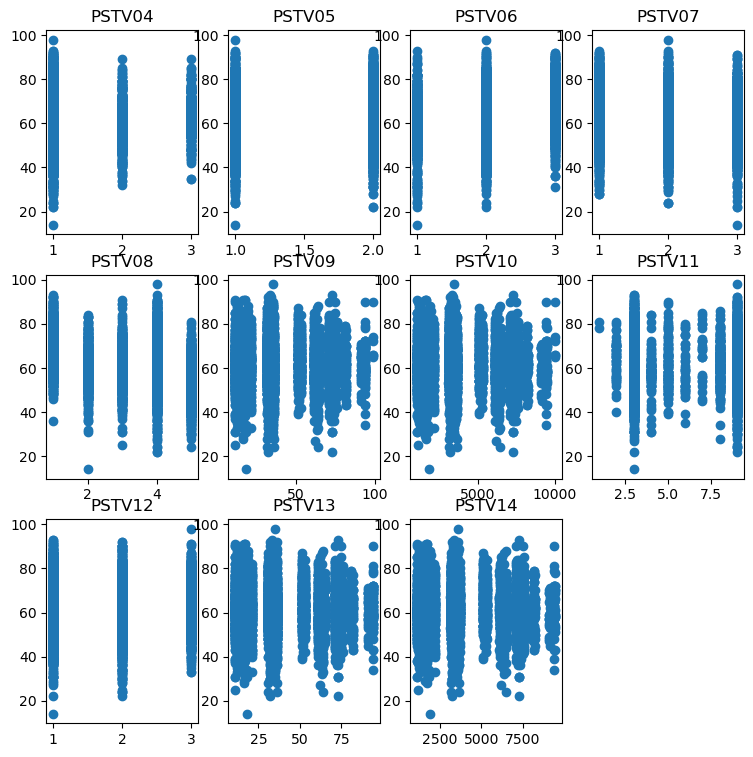

In [23]:
fig=plt.figure(figsize=(9,9))
temp=1
for i in X.columns:
    ax=fig.add_subplot(3,4, temp)
    temp+=1
    ax.scatter(X[i], y)
    ax.set_title(str(i))

In [400]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X)
poly_features = poly.transform(X)

In [409]:
train_data, validation_data, train_value, validation_value= train_test_split(poly_features, y, train_size=0.8, random_state=32112)
model= LinearRegression().fit(train_data, train_value)

print(f'Train   :   {r2_score(train_value, model.predict(train_data))}')
print(f'Test    :   {r2_score(validation_value, model.predict(validation_data))}')

Train   :   0.2922068875432101
Test    :   0.30484852979169885


In [411]:
poly_test=poly.transform(test_data)
model= LinearRegression().fit(poly_features, y)
predicted=model.predict(poly_test)

In [414]:
savefile(predicted, "5poly.csv")